**Generate Sample Data**

In [4]:
import pandas as pd
import numpy as np

sales_data = pd.DataFrame({
    'SKU': ['A101'] * 25 + ['A102'] * 25,
    'Date': pd.date_range(start='2024-01-01', periods=50),
    'Quantity_Sold': np.random.randint(100, 500, 50),
    'Region': ['North America'] * 25 + ['Europe'] * 25
})

supplier_data = pd.DataFrame({
    'Supplier_ID': ['S001', 'S002'] * 25,
    'SKU': ['A101'] * 25 + ['A102'] * 25,
    'Lead_Time': np.random.randint(5, 15, 50),
    'Performance_Score': np.random.uniform(0.8, 1.0, 50)
})

inventory_data = pd.DataFrame({
    'SKU': ['A101'] * 25 + ['A102'] * 25,
    'Location': ['Warehouse_1'] * 25 + ['Warehouse_2'] * 25,
    'Current_Stock': np.random.randint(500, 2000, 50),
    'Reorder_Point': np.random.randint(300, 1000, 50)
})

logistics_data = pd.DataFrame({
    'Shipment_ID': ['SH001', 'SH002'] * 25,
    'SKU': ['A101'] * 25 + ['A102'] * 25,
    'Destination': ['North America'] * 25 + ['Europe'] * 25,
    'Shipment_Time': np.random.randint(3, 10, 50),
    'Delay_Flag': np.random.choice([True, False], 50)
})

market_data = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=50),
    'Region': ['North America'] * 25 + ['Europe'] * 25,
    'Season': ['Winter'] * 50,
    'Demand_Index': np.random.uniform(1.0, 1.5, 50)
})

sales_data.to_csv('sales_data.csv', index=False)
supplier_data.to_csv('supplier_data.csv', index=False)
inventory_data.to_csv('inventory_data.csv', index=False)
logistics_data.to_csv('logistics_data.csv', index=False)
market_data.to_csv('market_data.csv', index=False)

sales_data.head()


,SKU,Date,Quantity_Sold,Region
0,A101,2024-01-01,394,North America
1,A101,2024-01-02,346,North America
2,A101,2024-01-03,326,North America
3,A101,2024-01-04,245,North America
4,A101,2024-01-05,245,North America


**Read Generated Data**

In [5]:
sales_data = pd.read_csv('sales_data.csv')
supplier_data = pd.read_csv('supplier_data.csv')
inventory_data = pd.read_csv('inventory_data.csv')
logistics_data = pd.read_csv('logistics_data.csv')
market_data = pd.read_csv('market_data.csv')


**Data Preprocessing**

In [6]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
market_data['Date'] = pd.to_datetime(market_data['Date'])

sales_data.fillna(method='ffill', inplace=True)
supplier_data.fillna(method='ffill', inplace=True)

sales_data.head()


<ipython-input-6-3bf8d91bf834>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_data.fillna(method='ffill', inplace=True)
<ipython-input-6-3bf8d91bf834>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  supplier_data.fillna(method='ffill', inplace=True)


,SKU,Date,Quantity_Sold,Region
0,A101,2024-01-01,394,North America
1,A101,2024-01-02,346,North America
2,A101,2024-01-03,326,North America
3,A101,2024-01-04,245,North America
4,A101,2024-01-05,245,North America


**Built LSTM model for Demand Forecasting**

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

sales_grouped = sales_data.groupby('Date')['Quantity_Sold'].sum().values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
sales_scaled = scaler.fit_transform(sales_grouped)

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 7
X, Y = create_dataset(sales_scaled, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, Y, epochs=20, batch_size=1)

predicted_sales = model.predict(X)

predicted_sales = scaler.inverse_transform(predicted_sales)

predicted_sales[:10]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1657
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1152
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1006
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0794
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0965
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1184
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1077
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0986
Epoch 9/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0840
Epoch 10/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0770
Epoch 11/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0786
Epoch 12/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1162
Epoch 13/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0661
Epoch 14/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0955
Epoch 15/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0847
Epoch 16/20
42/42 ━

array([[296.9808 ],
       [310.18356],
       [318.02344],
       [315.28918],
       [303.2878 ],
       [285.30838],
       [276.61496],
       [278.33725],
       [290.35007],
       [308.99075]], dtype=float32)

**Developed simulation system for Supply Chain Disruptions using GAN**

In [8]:
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Model

def build_generator():
    input = Input(shape=(100,))
    x = Dense(128)(input)
    x = LeakyReLU(alpha=0.01)(x)
    x = BatchNormalization()(x)
    x = Dense(256)(x)
    x = LeakyReLU(alpha=0.01)(x)
    x = BatchNormalization()(x)
    output = Dense(1, activation='tanh')(x)

    model = Model(input, output)
    return model

def build_discriminator():
    input = Input(shape=(1,))
    x = Dense(128)(input)
    x = LeakyReLU(alpha=0.01)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(input, output)
    return model

generator = build_generator()
discriminator = build_discriminator()

generator.summary()
discriminator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,745 (186.50 KB)

 Trainable params: 46,977 (183.50 KB)

 Non-trainable params: 768 (3.00 KB)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

**Q learning method**

In [9]:
import numpy as np

num_states = 10
num_actions = 2
Q_table = np.zeros((num_states, num_actions))

alpha = 0.1
gamma = 0.95
epsilon = 0.1
total_episodes = 1000
max_steps = 100

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.randint(0, num_actions)  # Explore
    else:
        return np.argmax(Q_table[state, :])  # Exploit

for episode in range(total_episodes):
    state = np.random.randint(0, num_states)  # Initialize state
    for step in range(max_steps):
        action = choose_action(state)
        # Simulate environment response (reward)
        reward = np.random.uniform(-1, 1)  # Example reward
        new_state = np.random.randint(0, num_states)  # Transition to new state
        Q_table[state, action] = Q_table[state, action] + alpha * (reward + gamma * np.max(Q_table[new_state, :]) - Q_table[state, action])
        state = new_state

Q_table

array([[-0.13734056, -0.08660632],
       [-0.28682474,  0.10504589],
       [-0.01479721,  0.20385525],
       [-0.02404097, -0.15034659],
       [-0.13301049, -0.01581416],
       [ 0.12968072, -0.03479788],
       [-0.04140338,  0.08777128],
       [ 0.29901997, -0.03267303],
       [ 0.13038527, -0.07942636],
       [-0.0916167 ,  0.18266343]])

**SAMPLE Test Data**

In [10]:
test_sales_data = pd.DataFrame({
    'SKU': ['B101'] * 25 + ['B102'] * 25,
    'Date': pd.date_range(start='2024-03-01', periods=50),
    'Quantity_Sold': np.random.randint(50, 300, 50),
    'Region': ['Asia'] * 25 + ['South America'] * 25
})

test_supplier_data = pd.DataFrame({
    'Supplier_ID': ['S003', 'S004'] * 25,
    'SKU': ['B101'] * 25 + ['B102'] * 25,
    'Lead_Time': np.random.randint(6, 14, 50),
    'Performance_Score': np.random.uniform(0.85, 1.0, 50)
})

test_inventory_data = pd.DataFrame({
    'SKU': ['B101'] * 25 + ['B102'] * 25,
    'Location': ['Warehouse_3'] * 25 + ['Warehouse_4'] * 25,
    'Current_Stock': np.random.randint(300, 1500, 50),
    'Reorder_Point': np.random.randint(250, 800, 50)
})

test_logistics_data = pd.DataFrame({
    'Shipment_ID': ['SH003', 'SH004'] * 25,
    'SKU': ['B101'] * 25 + ['B102'] * 25,
    'Destination': ['Asia'] * 25 + ['South America'] * 25,
    'Shipment_Time': np.random.randint(3, 8, 50),
    'Delay_Flag': np.random.choice([True, False], 50)
})

test_market_data = pd.DataFrame({
    'Date': pd.date_range(start='2024-03-01', periods=50),
    'Region': ['Asia'] * 25 + ['South America'] * 25,
    'Season': ['Spring'] * 50,
    'Demand_Index': np.random.uniform(0.9, 1.4, 50)
})

test_sales_data.to_csv('test_sales_data.csv', index=False)
test_supplier_data.to_csv('test_supplier_data.csv', index=False)
test_inventory_data.to_csv('test_inventory_data.csv', index=False)
test_logistics_data.to_csv('test_logistics_data.csv', index=False)
test_market_data.to_csv('test_market_data.csv', index=False)

test_sales_data.head()


,SKU,Date,Quantity_Sold,Region
0,B101,2024-03-01,289,Asia
1,B101,2024-03-02,104,Asia
2,B101,2024-03-03,251,Asia
3,B101,2024-03-04,232,Asia
4,B101,2024-03-05,234,Asia


**Read the test Data**

In [11]:
test_sales_data = pd.read_csv('test_sales_data.csv')
test_supplier_data = pd.read_csv('test_supplier_data.csv')
test_inventory_data = pd.read_csv('test_inventory_data.csv')
test_logistics_data = pd.read_csv('test_logistics_data.csv')
test_market_data = pd.read_csv('test_market_data.csv')

test_sales_data.head()


,SKU,Date,Quantity_Sold,Region
0,B101,2024-03-01,289,Asia
1,B101,2024-03-02,104,Asia
2,B101,2024-03-03,251,Asia
3,B101,2024-03-04,232,Asia
4,B101,2024-03-05,234,Asia


**Data Preprocessing**

In [12]:
test_sales_data['Date'] = pd.to_datetime(test_sales_data['Date'])
test_market_data['Date'] = pd.to_datetime(test_market_data['Date'])

test_sales_data.head()


,SKU,Date,Quantity_Sold,Region
0,B101,2024-03-01,289,Asia
1,B101,2024-03-02,104,Asia
2,B101,2024-03-03,251,Asia
3,B101,2024-03-04,232,Asia
4,B101,2024-03-05,234,Asia


**Demand Forecasting Model**

In [19]:
test_sales_grouped = test_sales_data.groupby('Date')['Quantity_Sold'].sum().values.reshape(-1, 1)
test_sales_scaled = scaler.transform(test_sales_grouped)  # Use the same scaler as used for training

X_test, Y_test = create_dataset(test_sales_scaled, time_step)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

predicted_test_sales = model.predict(X_test)

predicted_test_sales = scaler.inverse_transform(predicted_test_sales)

forecasted_sales = pd.DataFrame({
    'Date': test_sales_data['Date'][time_step:len(predicted_test_sales) + time_step],
    'Forecasted_Quantity': predicted_test_sales.flatten()
})

forecasted_sales.head()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Date,Forecasted_Quantity
7,2024-03-08,341.279022
8,2024-03-09,351.080963
9,2024-03-10,348.209747
10,2024-03-11,354.860046
11,2024-03-12,360.479767


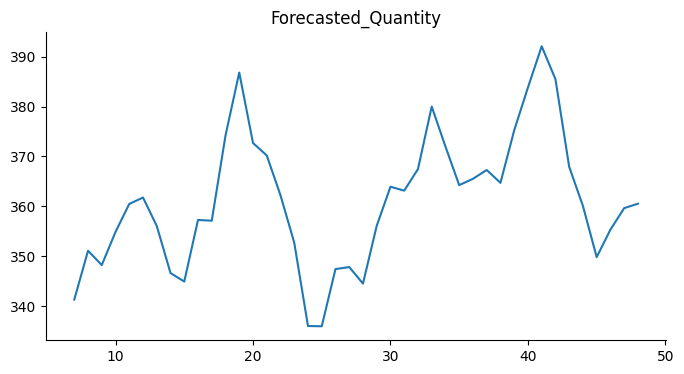

In [20]:
from matplotlib import pyplot as plt
forecasted_sales['Forecasted_Quantity'].plot(kind='line', figsize=(8, 4), title='Forecasted_Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


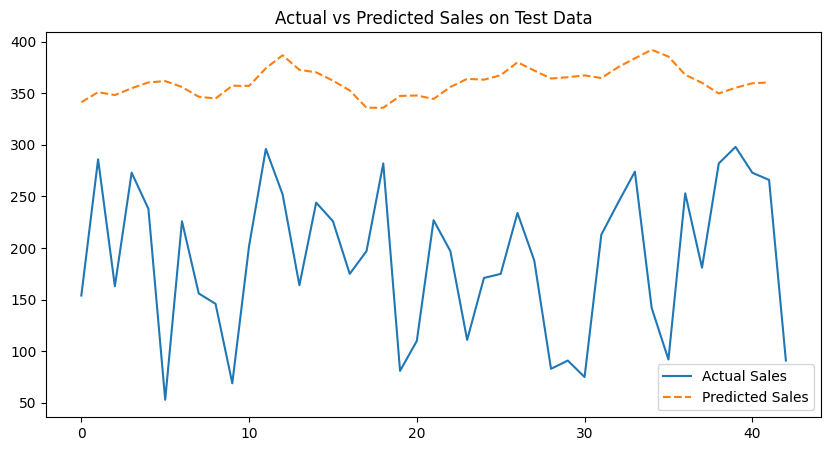

In [15]:
import matplotlib.pyplot as plt

test_sales_grouped = test_sales_data.groupby('Date')['Quantity_Sold'].sum().values.reshape(-1, 1)

test_sales_scaled = scaler.transform(test_sales_grouped)

time_step = 7
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

X_test, Y_test = create_dataset(test_sales_scaled, time_step)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

predicted_test_sales = model.predict(X_test)

predicted_test_sales = scaler.inverse_transform(predicted_test_sales)

plt.figure(figsize=(10, 5))
plt.plot(test_sales_grouped[time_step:], label='Actual Sales')
plt.plot(predicted_test_sales, label='Predicted Sales', linestyle='--')
plt.title('Actual vs Predicted Sales on Test Data')
plt.legend()
plt.show()

**Supply Chain Disruptions Using GANs**

In [21]:
def check_reorder(sku, current_stock, forecasted_demand, reorder_point):
    if current_stock < reorder_point and forecasted_demand > current_stock:
        return True
    return False

reorder_results = []
for i, row in test_inventory_data.iterrows():
    sku = row['SKU']
    current_stock = row['Current_Stock']
    reorder_point = row['Reorder_Point']

    forecasted_demand = forecasted_sales[forecasted_sales['Date'] == row['Location']]['Forecasted_Quantity'].sum()

    reorder_flag = check_reorder(sku, current_stock, forecasted_demand, reorder_point)
    reorder_results.append({
        'SKU': sku,
        'Location': row['Location'],
        'Current_Stock': current_stock,
        'Reorder_Point': reorder_point,
        'Forecasted_Demand': forecasted_demand,
        'Reorder': 'Yes' if reorder_flag else 'No'
    })

reorder_df = pd.DataFrame(reorder_results)
reorder_df.head()

,SKU,Location,Current_Stock,Reorder_Point,Forecasted_Demand,Reorder
0,B101,Warehouse_3,1329,360,0.0,No
1,B101,Warehouse_3,641,614,0.0,No
2,B101,Warehouse_3,1118,657,0.0,No
3,B101,Warehouse_3,924,622,0.0,No
4,B101,Warehouse_3,1040,458,0.0,No


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 454ms/step


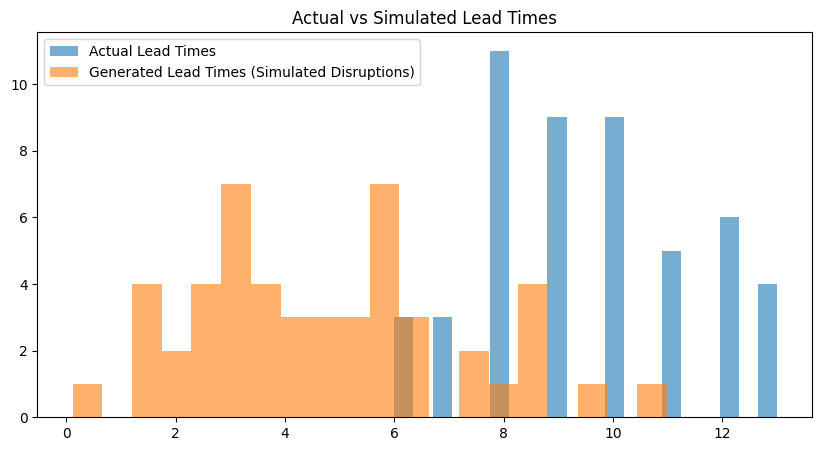

In [16]:
noise = np.random.normal(0, 1, (50, 100))

generated_disruptions = generator.predict(noise)

generated_disruptions_scaled = (generated_disruptions * (test_supplier_data['Lead_Time'].max() - test_supplier_data['Lead_Time'].min())) + test_supplier_data['Lead_Time'].min()

plt.figure(figsize=(10, 5))
plt.hist(test_supplier_data['Lead_Time'], bins=20, alpha=0.6, label='Actual Lead Times')
plt.hist(generated_disruptions_scaled, bins=20, alpha=0.6, label='Generated Lead Times (Simulated Disruptions)')
plt.title('Actual vs Simulated Lead Times')
plt.legend()
plt.show()


**Q-Learning Optimization for Inventory Management**

In [23]:
test_sales_trimmed = test_sales_data.iloc[time_step:].reset_index(drop=True)

In [24]:
test_inventory_states = np.random.randint(0, num_states, 10)

for state in test_inventory_states:
    action = choose_action(state)
    print(f"State: {state}, Chosen Action: {action} (0: No Reorder, 1: Reorder)")

State: 3, Chosen Action: 0 (0: No Reorder, 1: Reorder)
State: 1, Chosen Action: 1 (0: No Reorder, 1: Reorder)
State: 7, Chosen Action: 0 (0: No Reorder, 1: Reorder)
State: 7, Chosen Action: 0 (0: No Reorder, 1: Reorder)
State: 8, Chosen Action: 0 (0: No Reorder, 1: Reorder)
State: 5, Chosen Action: 0 (0: No Reorder, 1: Reorder)
State: 6, Chosen Action: 1 (0: No Reorder, 1: Reorder)
State: 0, Chosen Action: 1 (0: No Reorder, 1: Reorder)
State: 0, Chosen Action: 1 (0: No Reorder, 1: Reorder)
State: 0, Chosen Action: 1 (0: No Reorder, 1: Reorder)


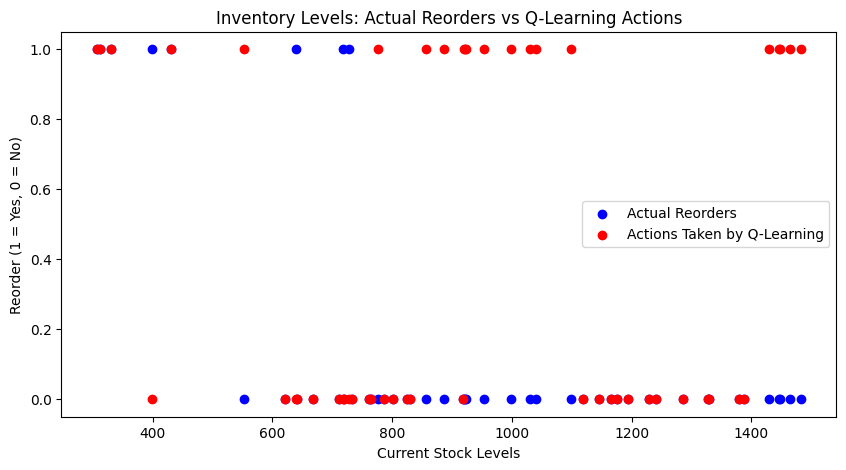

In [30]:
test_states = np.digitize(test_inventory_data['Current_Stock'].values, bins=np.linspace(0, 2500, num_states))

actions_taken = [choose_action(state) for state in test_states]

reorders = test_inventory_data['Current_Stock'] < test_inventory_data['Reorder_Point']

plt.figure(figsize=(10, 5))
plt.scatter(test_inventory_data['Current_Stock'], reorders, color='blue', label='Actual Reorders')
plt.scatter(test_inventory_data['Current_Stock'], actions_taken, color='red', label='Actions Taken by Q-Learning')
plt.title('Inventory Levels: Actual Reorders vs Q-Learning Actions')
plt.xlabel('Current Stock Levels')
plt.ylabel('Reorder (1 = Yes, 0 = No)')
plt.legend()
plt.show()
